In [28]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random
import configparser
# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# compare doctor diagnosis record  and the result base on some test index

In [29]:
config = configparser.ConfigParser()
config.sections()
config.read('config.ini')

bp_file =config['DEFAULT']['T2DDX_p']
feature_max_p =config['DEFAULT']['feature_max']

t2ddx_pd = pd.read_csv(bp_file)
feature_pd = pd.read_csv(feature_max_p)

In [30]:
t2ddx_pd.shape, feature_pd.shape

((188, 6), (3910, 24))

In [31]:
feature_pd.head()

,Deidentified_Pat_ID,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,...,a1c,gulcose,Fasting?,GLUCOSE 1 HR,GLUCOSE 2 HR,GLUCOSE 3 HR,GLUCOSE FASTING,HEMOLYSIS INDEX,ICTERIC INDEX,LIPEMIC INDEX
0,MGVKKNZN,2320.0,23.41,66.000,0.0,60.0,3.0,7.0,NaN,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNAOGDAK,3376.0,29.44,70.984,0.0,41.0,3.0,7.0,NaN,156.0,...,NaN,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNAZGATG,3340.8,29.13,71.000,0.0,67.0,3.0,7.0,NaN,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNGDNAOA,4268.8,43.08,66.000,1.0,55.0,3.0,7.0,NaN,152.0,...,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNGGAADT,3539.2,30.86,71.000,0.0,62.0,3.0,7.0,NaN,152.0,...,5.8,112.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# check how many record exist in both table3


In [32]:
raw_match = pd.merge(t2ddx_pd, feature_pd, how='outer',on='Deidentified_Pat_ID', indicator=True)
raw_match.head()

,Deidentified_Pat_ID,NotedYear,dx_name,CURRENT_ICD10_LIST,Age of T2D onset,PregnantAtDX?,Weight,Height,BMI,gender,...,gulcose,Fasting?,GLUCOSE 1 HR,GLUCOSE 2 HR,GLUCOSE 3 HR,GLUCOSE FASTING,HEMOLYSIS INDEX,ICTERIC INDEX,LIPEMIC INDEX,_merge
0,MNOAZATN,2018.0,"Type 2 diabetes mellitus without complication,...",E11.9,57.0,NaN,NaN,NaN,NaN,0.0,...,126.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1,ZAKVZZZ,2017.0,"Type 2 diabetes mellitus without complication,...",E11.9,81.0,NaN,NaN,NaN,NaN,0.0,...,172.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
2,ZAVKHOT,2015.0,Type 2 diabetes mellitus (HCC),E11.9,49.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,ZDADNTZ,2017.0,"Type 2 diabetes mellitus without complication,...",E11.9,58.0,NaN,3926.4,NaN,67.0,0.0,...,204.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
4,ZDAGOHAG,2015.0,Controlled diabetes mellitus type II without c...,E11.9,62.0,NaN,NaN,NaN,NaN,0.0,...,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both


In [33]:
raw_match.shape

(3968, 30)

In [34]:
raw_match[raw_match['_merge']=='left_only'].shape

(58, 30)

# both exist records 

In [35]:
both_exist = raw_match[raw_match['_merge']=='both']
both_exist.shape

(130, 30)

In [36]:
both_exist_notna = both_exist[both_exist['a1c'].notna()]
both_exist_notna.shape

(128, 30)

In [37]:
pd.Series(both_exist_notna["dx_name"].tolist()).sort_values().unique()

array(['Controlled diabetes mellitus type II without complication (HCC)',
       'Controlled type 2 diabetes mellitus without complication (HCC)',
       'Controlled type 2 diabetes mellitus without complication, with long-term current use of insulin (HCC)',
       'Controlled type 2 diabetes mellitus without complication, without long-term current use of insulin (HCC)',
       'DM (diabetes mellitus) (HCC)',
       'DM II (diabetes mellitus, type II), controlled (HCC)',
       'DM type 2, goal HbA1c 7%-8% (HCC)', 'Diabetes mellitus (HCC)',
       'Diabetes mellitus type 2 in nonobese (HCC)',
       'Diabetes mellitus type 2 without retinopathy (HCC)',
       'Diabetes mellitus type 2, insulin dependent (HCC)',
       'Diabetes mellitus, type 2 (HCC)',
       'Diabetes mellitus, type II (HCC)',
       'Diabetes type 2, controlled (HCC)',
       'New onset type 2 diabetes mellitus (HCC)',
       'Type 2 diabetes mellitus (HCC)',
       'Type 2 diabetes mellitus with hemoglobin A1c goal 

In [38]:
len(both_exist_notna[both_exist_notna['dx_name']=='DM (diabetes mellitus) (HCC)'])

1

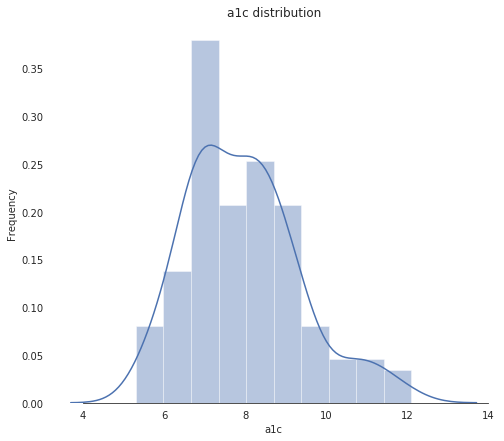

In [39]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(both_exist_notna['a1c'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="a1c")
ax.set(title="a1c distribution")
sns.despine(trim=True, left=True)
plt.show()

In [40]:
both_exit_notna.pivot_table(index=['a1c'], aggfunc='size')

NameError: name 'both_exit_notna' is not defined

# # so in both table exist 130 records, 2 records a1c is nan, 2 records is a1c <5.7, 126 records a1c>5.7

# result base on a1c test, 

In [ ]:
a1c_de = feature_pd[feature_pd['a1c']>5.7]
a1c_de.shape

In [ ]:
match_dt = pd.merge(t2ddx_pd, a1c_de, how='inner', on='Deidentified_Pat_ID')
match_dt.shape

In [ ]:
res_match = pd.merge(t2ddx_pd, match_dt[['Deidentified_Pat_ID']], how='outer',on='Deidentified_Pat_ID', indicator=True)
res_match.head()

In [ ]:
res_match.pivot_table(index=['_merge'], aggfunc='size')

# check the sample number in 

In [ ]:
raw_match.shape